# Linear layers

This notebook plots some linear layers' weights used as basis in LISSOM. The layers have different weight initilizations, which are plotted.

In [1]:
from pylissom.nn.modules.linear import *

## Gaussian

This example build a simple layer of neurons of dimension 5x5, that receives its input from a 25x25 retina.
The figure below plots the weights of the neurons. Each neuron is full connected with the 25x25 input.
The weights are initialized with gaussian values. The center of the gaussian moves, according to where is the neuron in the 5x5 layer. Thus, the weights of the neuron of the center, are a perfect gaussian. The weights of the middle neuron at the top line, are like a half moon, because the weights are initialized with a gaussian that has its center towards the top of the 25x25 array.  

In [2]:
in_features = 25**2
out_features = 5**2
gaussian_linear = GaussianLinear(in_features, out_features, sigma=5)

In [3]:
from pylissom.utils.plotting import *

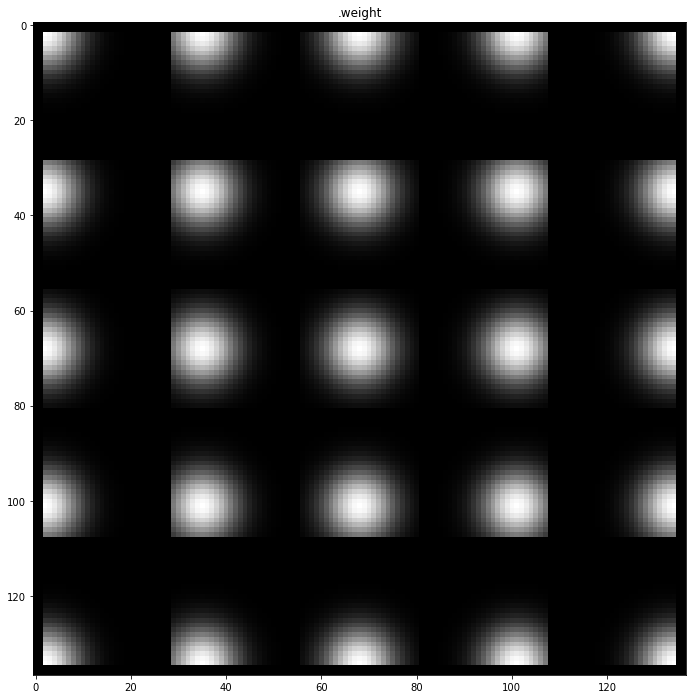

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plot_layer_weights(gaussian_linear)

## CloudGaussian

This example is similar to the previous example, but the gaussian has noise.

In [5]:
in_features = 25**2
out_features = 5**2
gaussian_cloud_linear = GaussianCloudLinear(in_features, out_features, sigma=5)

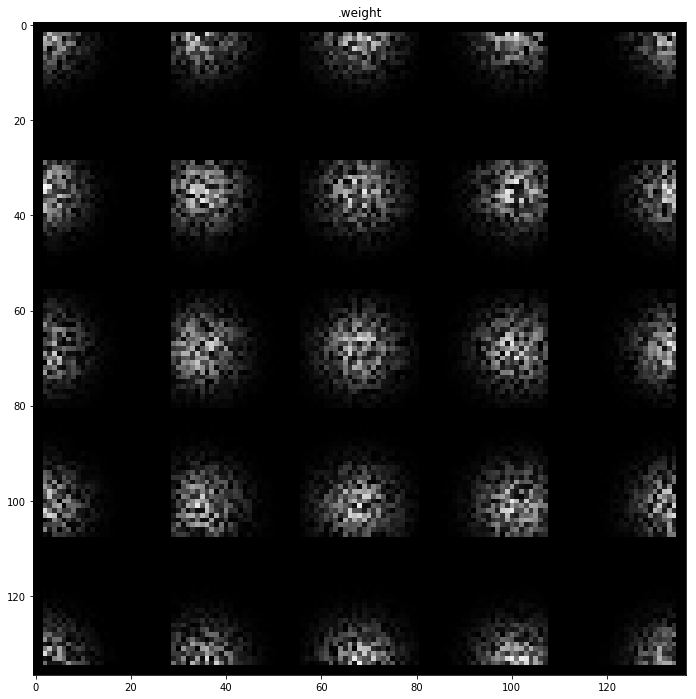

In [6]:
plt.figure(figsize=(12, 12))
plot_layer_weights(gaussian_cloud_linear)

## DoG

In this example, the weights are initialized with a difference of gaussians. Difference of gaussians are used in the LGN layer of LISSOM, which works as an edge detection mechanism. For an example, see *Lissom_modules* ipynb.

The formula itself for each weight value is this:

![image.png](imgs/dog_fn.png)

In [7]:
in_features = 20**2
out_features = 5**2
gaussian_linear = UnnormalizedDifferenceOfGaussiansLinear(in_features, out_features, on=True, sigma_surround=2)

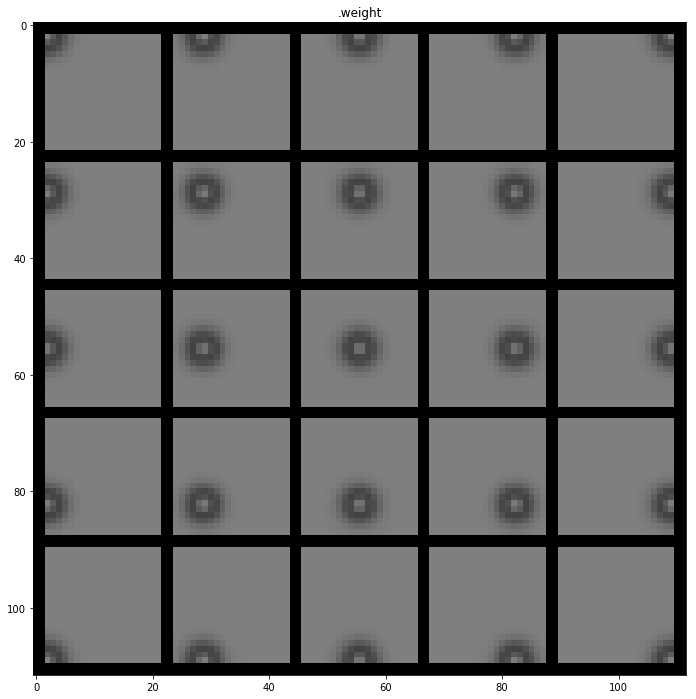

In [8]:
plt.figure(figsize=(12, 12))
plot_layer_weights(gaussian_linear)

## Piecewise Sigmoid

This example just shows an example of a piecewise sigmoid, a function that is used in LISSOM for the computation of the activation of the neurons. It tries to approximate the sigmoid function according to this formula:

![image.png](imgs/pw_sigmoid.png)

In [9]:
pw_sigmoid = PiecewiseSigmoid(min_theta=4, max_theta=9)

In [10]:
inputs = [torch.autograd.Variable(torch.Tensor([i])) for i in range(0, 11)]

In [11]:
activations = [pw_sigmoid(i) for i in inputs]

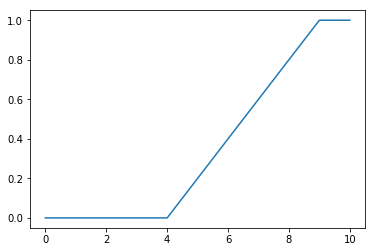

In [12]:
import matplotlib.pyplot as plt
plt.plot([a.data.numpy() for a in activations])
plt.show()